In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Notes orginally from http://www.cv.nrao.edu/course/astr534/Radiometers.html. This work is licensed under a Creative Commons Attribution-Noncommercial-Share Alike 3.0 License. (http://creativecommons.org/licenses/by-nc-sa/3.0/) 

# Lets talk random numbers and spectra

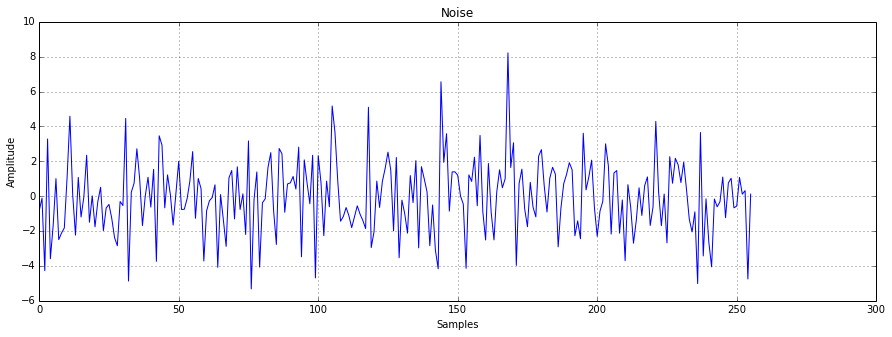

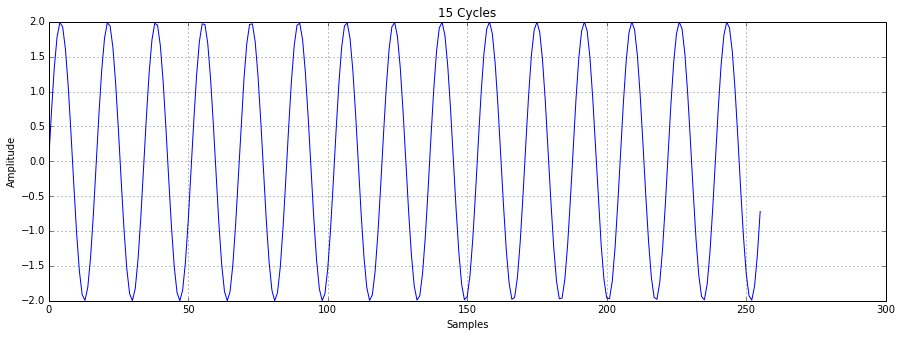

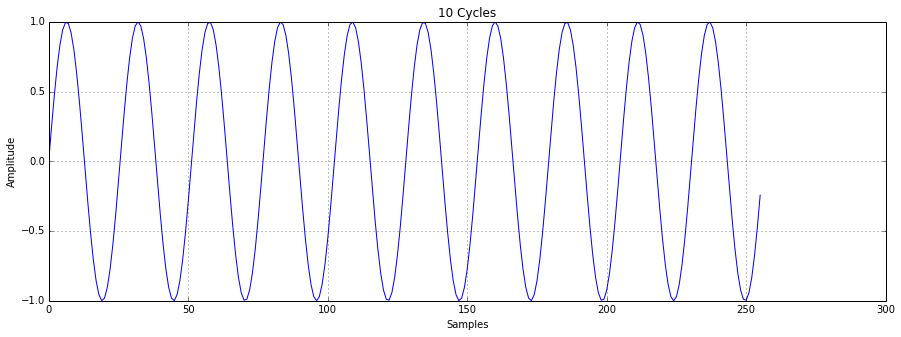

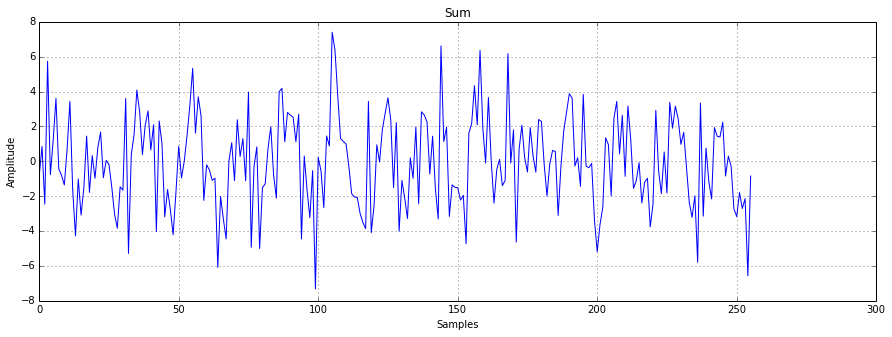

In [36]:
random.seed(2)
N = 256

#a random signal
random_signal = 2 * randn(N)
figure(figsize=(15,5))
plot(random_signal)
title('Noise')
xlabel('Samples')
ylabel('Amplitude')
grid()

#a "tone" with 15 cycles
fifteen_cycle_signal = 2 * sin(2 * pi * arange(N)/N * 15)
figure(figsize=(15,5))
plot(fifteen_cycle_signal)
title('15 Cycles')
xlabel('Samples')
ylabel('Amplitude')
grid()

#a "tone" with 10 cycles
ten_cycle_signal = 1 * sin(2 * pi * arange(N)/N * 10)
figure(figsize=(15,5))
plot(ten_cycle_signal)
title('10 Cycles')
xlabel('Samples')
ylabel('Amplitude')
grid()

#add them all together
V_test =  fifteen_cycle_signal + ten_cycle_signal + random_signal
figure(figsize=(15,5))
plot(V_test)
title('Sum')
xlabel('Samples')
ylabel('Amplitude')
grid()

By taking the FFT of the data it allows you to see the components that make up the signal. The two spikes from the harmonic signal are clear, but what about the spike at 25?

(0, 40)

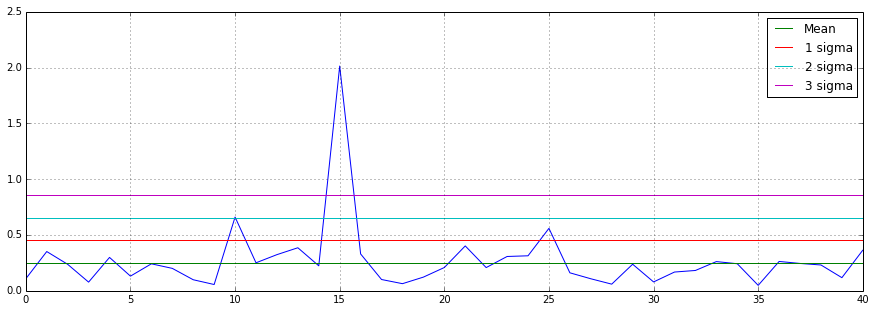

In [37]:
figure(figsize=(15,5))
F = abs(fft.fft(V_test))/(N/2)
plot(F)
m = mean(F)
s = std(F)
plot([0,N/2],[m,m],label='Mean')
plot([0,N/2],[m+s,m+s],label='1 sigma')
plot([0,N/2],[m+2*s,m+2*s],label='2 sigma')
plot([0,N/2],[m+3*s,m+3*s],label='3 sigma')
legend()
grid()
xlim(0,40)

# Receiver block diagrams

# Radiometers

Natural radio emission from the
cosmic
microwave background, discrete astronomical
sources, the Earth's atmosphere, and the ground is
random noise that is nearly indistinguishable from the
noise generated by a warm resistor or by receiver electronics. A
radio receiver used to measure the average power of the noise coming
from a
radio telescope in a well-defined frequency range is called a radiometer.
Noise voltage has
zero mean and varies randomly on the very short time scales
(nanoseconds) comparable with the inverse bandwidth of
the radiometer. A
square-law
detector in the radiometer squares the input noise voltage
to produce an output voltage proportional to the input noise
power. Noise power
is always greater than zero and usually steady when averaged
over much longer times (seconds to hours). By averaging a large
number $N$ of
independent noise samples, an ideal radiometer can determine
the
average noise
power with a fractional uncertainty as small as $(N/2)^{-1/2} \ll 1$
and detect a faint source that increases the antenna temperature by a
tiny fraction of the
total noise power. The
ideal radiometer equation expresses this result in terms of the
receiver
bandwidth and the averaging time. Gain variations in practical
radiometers, fluctuations in atmospheric emission, and confusion by
unresolved radio sources may significantly degrade the actual
sensitivity compared with the sensitivity predicted by the ideal
radiometer equation.

## Band-limited noise

The voltage at the output of a
radio telescope is the sum of noise voltages from many independent
random
contributions. The central
limit
theorem states that the amplitude distribution of such
noise is nearly Gaussian. The figure below shows the histogram of
about
20,000 independent voltage samples randomly drawn from a Gaussian
parent distribution
having rms $V_{\rm rms}$ and mean $\langle V \rangle = 0$. The
sampling theorem (Eq.
SF6) states
that any signal (even if the "signal" is just noise) of limited
bandwidth
$\Delta \nu$ and duration $\tau$ can be
represented by $2N$ independent samples. The figure also shows $N
=
100$ successive samples drawn from the Gaussian noise
distribution. This
sequence of voltages is representative of band-limited noise in the
frequency range from 0 to $\Delta\nu$ during a time interval $\tau$
such that $\Delta\nu\times \tau = N/2 = 50$, e.g., noise extending to
frequency $\Delta\nu = 1$ MHz sampled for $\tau = 50\,\mu$s. This
is what the band-limited noise output voltage of a radio telescope
looks
like. 

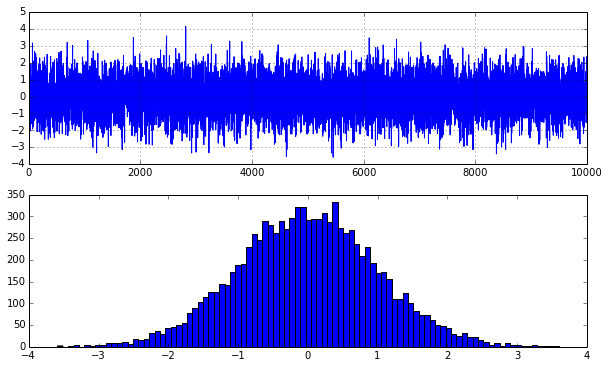

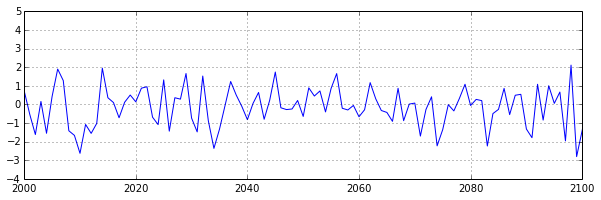

In [18]:
N = 10000
V = randn(N)
Vrms = sqrt(mean(V**2))
figure(figsize=(10,6))
subplot(211)
plot(V/Vrms)
grid()
subplot(212)
hist(V/Vrms,100);
xlim(-4,4)
figure(figsize=(10,3))
plot(V)
xlim(2000,2100)
grid()

The output
voltage $V$ of a radio telescope varies
rapidly on short time scales, as indicated by the upper plot showing
100
independent
samples of band-limited noise drawn from a Gaussian probability
distribution $P(V/V_{\rm rms})$
(lower plot) having zero mean and fixed rms $V_{\rm rms}$. 


It is convenient to describe noise
power in units of temperature. Since the noise power per unit bandwidth
generated by a resistor of temperature $T$ is $P_\nu = k T$ in the
low-frequency limit, we can
define the 
noise temperature
of  noiselike source in
terms of its power per unit bandwidth
$P_\nu$:
$$\bbox[border:3px blue solid,7pt]{T_{\rm N} \equiv {P_\nu
\over k}}\rlap{\quad \rm {(3E1)}}$$ 
where $k \approx 1.38 \times 10^{-23}$ Joule K$^{-1}$ is
the Boltzmann constant.

### Calibration of the signal

There are two two ways in which you can convert the measured voltage into a measured antenna temperature The first is via a noise diode and the secon is by observing a known source on the sky. 

### Noise diode

The first is to have a known noise reference signal injected into the signal path and to use this step to calibrate the system. The most common source for this noise injection is fro a device known as noise diode. 

![](http://astro.u-strasbg.fr/~koppen/RJove/pictures/sourcecirc.jpg)

### On sky calibration

There are a set of sources on the sky that are point-like and their flux density is stable with time. These sources are known as calibrators. In order to measure the antenna temperature you point the telescope at a calibrator and note the output power in uncalibrated counts. This is then referenced to the known flux density of the calibrator, you now have a value for the Janskys per count for the system. Next you point the telescope at an unknown source and note the difference in power in counts. By uning the known Janskys per count you can convert this power to Janskys. 

### Measuring $T_{sys}$

A common method to determin $T_{sys}$ is via the Y-method.

Using 

$T_{sys} = T_{bg}+T_{atm}(\theta) + T_{ant}(\theta)+T_{rx}$

we group some of the terms together to get $T_{cold}$

$T_{cold}=T_{bg}+T_{atm}(\theta) + T_{ant}(\theta)$

so

$T_{sys} = T_{cold} + T_{rx}$

A good approximation for $T_{cold}$ around 1GHz is 

$T_{cold} = 17.1-3(freq/1e9)$

For the $T_{hot}$ we insert the hotbox infront of the feed so that the entire beam is seeing a material at a constant temperature.

If we use $P=gkTB$ where $P$ is the power, $g$ is the gain of the system, $k$ is Boltzmann's constant and $B$ is the bandwidth we get $P_{hot}=g_{hot}k(T_{hot}+T_{rx})B$ and $P_{cold}=g_{cold}k(T_{cold}+T_{rx})B$. If we do the observations of the hot and cold at the same elevation then the gain should not change for the system and we get $g_{hot}/g_{cold}=\gamma=1$

$Y=\frac{g_{hot}k(T_{hot}+T_{rx})B}{g_{cold}k(T_{cold}+T_{rx})B}=\frac{T_{hot}+T_{rx}}{T_{cold}+T_{rx}}$

so 

$T_{rx}=\frac{T_{hot}-YT_{cold}}{Y-1}$

so we can determine $T_{sys}$


The temperature equivalent to the
 noise power from all
sources referenced to the input of an ideal
receiver connected to the output of a radio telescope is called the 
system
noise temperatureIt
is the sum of many contributors to the antenna temperature $T_{\rm A}$
plus the receiver
noise temperature
$T_{\rm rcvr}$. 
$$\bbox[border:3px blue solid,7pt]{T_{\rm sys} = T_{\rm cmb} + \Delta
T_{\rm source} + T_{\rm atm} +
T_{\rm spillover} + T_{\rm rcvr} + \dots}\rlap{\quad \rm
{(3E2)}}$$  The antenna-temperature
contributions listed explicitly
in Equation 3E2 are $T_{\rm cmb} \approx 2.73$ K
from the cosmic microwave background, $\Delta T_{\rm source}$ from the
astronomical source being observed, $T_{\rm atm}$ from atmospheric
emission in the telescope beam, and $T_{\rm spillover}$ to account for
radiation that the feed picks up in directions beyond the edge of the
reflector. $T_{\rm rcvr}$ represents the noise power generated by
the receiver itself, referenced to the receiver input. All
receivers generate noise, and any receiver can be represented by an
equivalent circuit consisting of an ideal noiseless receiver whose
input is a resistor of temperature $T_{\rm rcvr}$. Receiver noise is
usually minimized by cooling the receiver to cryogenic temperatures.

The astronomical
signal $\Delta T_{\rm source}$ was written with a $\Delta$ to emphasize
that it is usually much smaller than the total system noise: $\Delta
T_{\rm source} \ll T_{\rm sys}$. For example, in the $\nu_{\rm RF}
\approx 4.85$ GHz sky survey made with the 300-foot telescope, the
system
noise was $T_{\rm sys} \approx 60$ K, but the faintest sources detected
contributed only $\Delta T_{\rm source} \approx 0.01$ K. 

## Radiometers

The purpose of the simplest 
total-power radiometer is to
measure the timed-averaged power of the input noise in some
well-defined
radio frequency (RF)
range 
$$\nu_{\rm RF} - {\Delta \nu_{\rm RF} \over 2} {\rm ~~to~~}
\nu_{\rm RF} + {\Delta \nu_{\rm RF} \over 2} ,$$ where $\Delta \nu_{\rm
RF}$ is
the receiver bandwidth.
For
example, the receivers used on
the 300-foot telescope to make the $\lambda \approx
6$ cm continuum survey of the northern
sky had a center radio frequency
$\nu_{\rm
RF}\approx 4.85 \times 10^9$ Hz a bandwidth $\Delta \nu_{\rm RF}
\approx 6
\times 10^8$ Hz. 

The simplest radiometer
consists of four stages in
series:

1. an ideal (lossless) bandpass filter that passes input noise only in the desired frequency range,
2. an ideal square-law detector whose output voltage is proportional to the square of its input voltage; that is, its output voltage is proportional to its input power,
3. a signal averager or integrator that smoothes out the rapidly fluctuating detector output, and
4. a voltmeter or other device to measure and record the smoothed voltage.


![Power Law Detector](http://www.cv.nrao.edu/course/astr534/images/rxblock.svg)
The simplest
radiometer filters the broadband noise coming from the telescope,
multiplies the filtered voltage by itself (square-law detection),
smoothes the detected voltage, and measures the smoothed voltage.
The function of the detector is to convert the noise voltage, which has
zero mean, to noise power, which is proportional to the square of
voltage. 


After passing through an input filter
of width $\Delta \nu_{\rm RF} <
\nu_{\rm RF}$ the noise voltage is no longer completely random; it
looks
more like a sine wave of frequency $\approx \nu_{\rm RF}$ whose
amplitude envelope varies
randomly
on time scales $\Delta t
\approx (\Delta \nu_{\rm RF})^{-1} > \nu_{\rm RF}^{-1}$. The
positive
and negative envelopes are similar so long as $\Delta \nu_{\rm RF} \ll
\nu_{\rm RF}$.

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


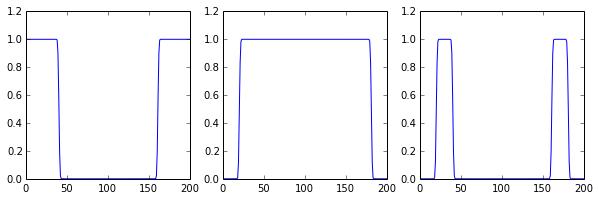

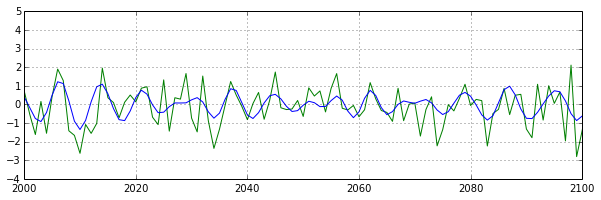

In [19]:
def kernel(M,fc):
    i = arange(0,M+1)
    k = (sin(2 * pi * fc *(i-M/2))/(i-M/2)) * (0.42 - 0.5 * cos(2 * pi * i/M) + 0.08 * cos(4 * pi * i/M))
    k[M/2] = 2 * pi * fc
    return k / ((0.5/fc)*max(k))
    

M = 200
fc = 0.2
l = kernel(M,fc)


fc = 0.1
l2 = kernel(M,fc)

h = zeros(M+1)
h[M/2] = 1
h = h - l2
figure(figsize=(10,3))
subplot(131)
plot(abs(fft.fft(l)))
subplot(132)
plot(abs(fft.fft(h)))
subplot(133)
plot(abs(fft.fft(h)) * abs(fft.fft(l)))


V_f = convolve(h,convolve(l,V,'same'),'same')

figure(figsize(10,3))
plot(V,'g')
plot(V_f,'b')
xlim(2000,2100)
grid()

Lets have a look at what the spectrum can tell us. In the eample below we have a noise process and two clear harmonic (simusoidal) signals all added together $V_{test}$. In the time domain there is little or no way to distinguish what the composit signal is mafe up of.

The voltage
output of the filter with center frequency $\nu_{\rm RF}$ and
bandwidth $\Delta \nu_{\rm RF} < \nu_{\rm RF}$ is a sinusoid with
frequency $\nu_{\rm
RF}$ whose envelope (dashed curves) fluctuates on time scales $(\Delta
\nu_{\rm
RF})^{-1} > (\nu_{\rm RF})^{-1}$.

The filtered output is sent to a
square-law detector, a device whose output
voltage is proportional to the square of its input voltage, so the
detector output voltage is proportional to its input power. For a
narrowband (quasi-sinudoidal) input voltage $V_{\rm i} \approx \cos(2
\pi
\nu_{\rm RF}t)$ at frequency $\nu_{\rm RF}$, the detector output
voltage
would be $V_{\rm o} \propto \cos^2(2 \pi \nu_{\rm RF}t)$. This
can
be rewritten as $[1 + \cos(4 \pi \nu_{\rm RF}t)]/2$, a function whose
mean value equals the average power of the input signal. In
addition to the DC (zero-frequency component) there is an oscillating
component at twice $\nu_{\rm RF}$. The
detector output spectrum for a finite bandwidth $\Delta \nu_{\rm RF}$
and a typical waveform are shown below:

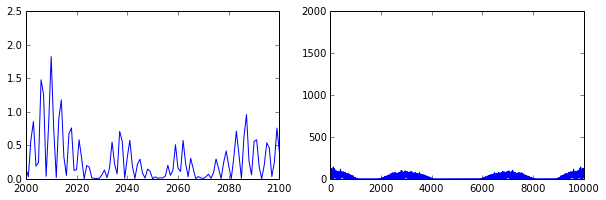

In [20]:
V_d = V_f**2
subplot(121)
plot(V_d)
xlim(2000,2100)
subplot(122)
plot(abs(fft.fft(V_d)))


The output
voltage of a square-law detector is proportional to the square of the
input voltage. It is always positive, so its mean (DC component)
is positive and is proportional to the input power. The high
frequency ($\nu \approx 2 \nu_{\rm RF}$) fluctuations contain no useful
information about the source and are filtered out by the next stage.

The oscillations under the envelope
approach zero every $\Delta t
\approx (2 \nu_{\rm RF})^{-1}$. Thus the oscillating component of the
detector output is centered near the frequency $2 \nu_{\rm RF}$. The
detector output also has frequency components near zero (DC) since the
mean output voltage is greater than zero. 


The output
voltage histogram of
a square-law detector fed with Gaussian noise is peaked sharply near
zero and has a long positive tail. The mean detected voltage $\langle V
\rangle$ equals the mean squared input voltage, and the rms of the
detected
voltage is $2^{1/2}\langle V \rangle$. For a detailed derivation of the
detector output distribution
and its rms, click 

Both the rapidly varying component at
frequencies near $2
\nu_{\rm RF}$ and its envelope vary on time scales that are normally
much shorter than the time scales on which the average signal power
$\Delta T$ varies. The unwanted rapid
variations can be suppressed by taking the arithmetic mean of the
detected envelope over some time scale
$\tau
\gg (\Delta \nu_{\rm RF})^{-1}$ by integrating or averaging the
detector output.
This integration might
be done electronically by smoothing with an RC (resistance plus
capacitance) filter or numerically by sampling
and digitizing
the detector output voltage and then computing its running mean.

Integration greatly reduces the
receiver output
fluctuations. In the time interval $\tau$ there are $ N = 2\Delta
\nu_{\rm RF} \tau$ independent samples of the total noise power
$T_{\rm sys}$, each of which has an rms error $\sigma_{\rm T} \approx
2^{1/2}T_{\rm sys}$. The rms error in the average of $N \gg 1$
independent
samples is reduced by the factor $\sqrt{N}$, so the rms receiver output
fluctuation $\sigma_{\rm T}$ is only $$\sigma_{\rm T} = {2^{1/2}T_{\rm
sys} \over N^{1/2}}~.$$ In terms of bandwidth $\Delta \nu_{\rm RF}$ and
integration time $\tau$, 
$$\bbox[border:3px blue solid,7pt]{\sigma_{\rm T} \approx {T_{\rm sys}
\over
\sqrt{\Delta \nu_{\rm RF} \tau}}}\rlap{\quad \rm {(3E3)}}$$
after smoothing. The central limit theorem of statistics implies
that heavily smoothed ($\Delta \nu_{\rm RF} \tau \gg 1$) output
voltages also have a
nearly Gaussian amplitude
distribution. This important equation is called the ideal
radiometer
equation for a total-power receiver. The weakest detectable
signals
$\Delta T$ only have to be several (typically five) times the output
rms $\sigma_{\rm
T}$ given by the radiometer equation, not several times the total
system noise $T_{\rm sys}$. The product $\Delta \nu_{\rm RF}
\tau$ may
be quite large in practice ($10^8$ is not
unusual), so signals as
faint as $\Delta T \sim 5 \times 10^{-4} T_{\rm sys}$ would be
detectable. The two figures below illustrate the effects of
smoothing the detector output by taking running means of lengths $N =
50$ and $N = 200$
samples.

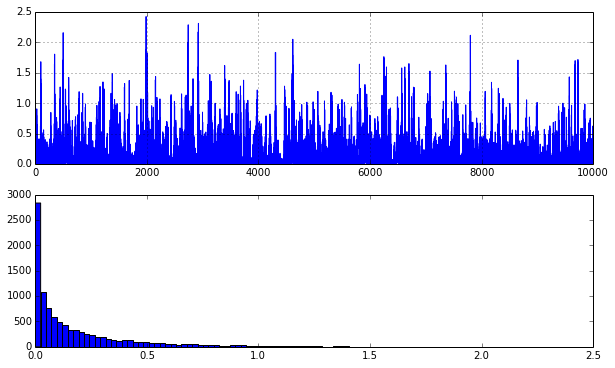

In [21]:
figure(figsize=(10,6))
subplot(211)
plot(V_d)
grid()
subplot(212)
hist(V_d,100);

The smoothed
output voltage from the integrator varies on time scale $\tau$ with
small amplitude $\sigma_{\rm T}$ given by the radiometer
equation. The top part of this figure shows the detected voltage
smoothed by an $N= 50$ sample running mean, and the bottom part shows
the amplitude distribution of the smoothed voltage. This
amplitude distribution has mean $\langle V \rangle$ and rms
$(2/N)^{1/2}\langle V \rangle = 0.2 \langle V \rangle$. As $N$ grows,
the smoothed amplitude distribution approaches a Gaussian. The
sampling theorem states that $N = 2\Delta\nu_{\rm RF} \tau$ so
$\Delta\nu_{\rm RF}\tau = 25$ for this example.



When the same
detector output is smoothed over $N = 200$ samples instead of $N = 50$
samples, the mean remains the same but the rms falls by a
factor of $4^{1/2} = 2$ to $0.1 \langle V \rangle$. In this example
$\Delta \nu_{\rm RF}\tau = 100$.

0.440388441463
0.232736001703


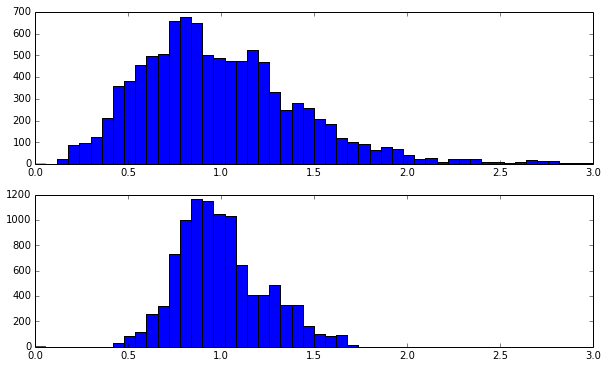

In [22]:
M = 50
l = ones(M+1)/M
V_o = convolve(l,V_d,'same')

figure(figsize=(10,6))
subplot(211)
hist(V_o/mean(V_o),50,range=(0,3));
xlim(0,3)
print std(V_o/mean(V_o))

M = 200
l = ones(M+1)/M
V_o = convolve(l,V_d,'same')


subplot(212)
hist(V_o/mean(V_o),50,range=(0,3));
xlim(0,3)
print std(V_o/mean(V_o))


Example: The $\nu \approx 4.85$ GHz
($\lambda \approx 6$ cm) northern sky survey made with the 300-foot
(91 m) telescope.
This survey used total-power
radiometers very similar to the radiometer
described above, but with multistage RF amplifiers that simultaneously
amplified and
filtered the input signals. The telescope was driven up and down in
elevation at its slew rate $\pm 10^\circ$ per minute = 10 arcmin per
second of time. The beamwidth was
$$\theta_{\rm HPBW} \approx
{1.2 \lambda \over D} = {1.2 c \over \nu_{\rm RF} D}$$
$$
\theta_{\rm HPBW} \approx { 1.2 \times 3 \times 10^8 {\rm ~m~s}^{-1}
\over 4.85 \times 10^9 {\rm ~Hz~} \times 91 {\rm ~m}} \approx 8.2
\times 10^{-4} {\rm ~rad} \approx 2.8 {\rm ~arcmin}$$ 
The scanning time
between half-power points was thus $\approx 0.3$ s. The data were
integrated and sampled
every $\tau = 0.1$ s, so there
were $\approx 3$ samples per half-power beamwidth. A subset of the
samples taken from one receiver during one scan covering the
declination range $\delta \approx -2^\circ$ to $\delta \approx
+73^\circ$ is shown.

<img
 alt="One channel scan output, 6 cm survey"
 src="http://www.cv.nrao.edu/course/astr534/images/OneChannelScan.gif" style="width: 616px; height: 643px;">


The intensity scale has been
calibrated in Kelvins, and the large
mean $T_{\rm sys} \approx 60$ K has been subtracted. By far the biggest
time-dependent signal (spanning a range of about 1 K) is caused by
ground
radiation entering the prime-focus feed via leakage through the
reflector mesh and spillover. Fortunately, this unwanted ground signal
varies smoothly with telescope elevation, so subtracting a
short (about 40 arcmin long) running-median baseline takes out the
spillover signal without removing compact radio sources. The
outputs from all 14 receiver channels (7 beams $\times$ 2
polarizations/beam) after baseline subtraction are shown in the next
viewgraph. Only now are the faint radio sources visible above the noise
fluctuations.

<img
 alt="14 channel scan output from 6 cm survey" src="http://www.cv.nrao.edu/course/astr534/images/ScanOut.gif"
 style="width: 783px; height: 605px;">


Data from all 14 receivers after
subtraction of running-median baselines. Sources appear as spikes in
both polarization channels (R and L) of one or two beams.
Interference is usually visible in all 14 receivers simultaneously.


The rms noise observed is consistent
with the prediction of the
total-power radiometer equation: 
$$\sigma_{\rm T} \approx {T_{\rm sys}
\over \sqrt{\Delta \nu_{\rm RF} \tau}} \approx {60\,{\rm K} \over
\sqrt{ 6 \times 10^8\,{\rm Hz} \times 0.1\,{\rm s} } } \approx
0.008\,{\rm K}$$

## Somecaveats

The ideal radiometer equation suggests that the sensitivity of a radio observation improves
as $\tau^{1/2}$ forever. In practice, systematic errors set a
floor to the noise level that can be reached. Receiver
gain changes, erratic fluctuations in atmospheric emission, or
"confusion" by the unresolved background of
continuum radio sources usually limit the
sensitivity of single-dish
continuum observations.

### Gain instability

Note that the output voltage of a
total-power
receiver is directly proportional to the overall gain $G$ of the
receiver: 
$$P_\nu = G k
T_{\rm sys}$$ If $G$ isn't perfectly constant, the change in output
$$\Delta P_\nu = \Delta G k T_{\rm sys}$$ caused by a gain
fluctuation
$\Delta G$ produces a false signal
$$\Delta T_{\rm G} = T_{\rm sys} \biggl(
{\Delta G \over G}\biggr)$$ that is indistinguishable from a
comparable change $\Delta T$ in the system noise temperature produced
by
an astronomical source. Since receiver gain fluctuations and noise
fluctuations are independent random processes, their variances
(the variance is the
square of the rms) add, and the total receiver
output fluctuation becomes: 
$$\sigma_{\rm total}^2 = \sigma_{\rm
noise}^2 + \sigma_{\rm G}^2$$ $$\sigma_{\rm total}^2 = T_{\rm sys}^2
\biggl[ {1 \over \Delta \nu_{\rm RF} \tau} + \biggl( {\Delta G \over G}
\biggr)^2 \biggr]$$ The 
practical total-power radiometer equation
is thus: $$\bbox[border:3px blue solid,7pt]{\sigma_{\rm T} \approx
T_{\rm sys} \biggl[ {1 \over \Delta
\nu_{\rm RF} \tau} + \biggl( {\Delta G \over G} \biggr)^2
\biggr]^{1/2}}\rlap{\quad \rm {(3E4)}}$$

 Clearly, gain fluctuations will
significantly degrade the
sensitivity unless $$\biggl( {\Delta G \over G} \biggr) \ll { 1 \over
\sqrt{\Delta \nu_{\rm RF} \tau}}$$ For example, the 5 GHz receiver used
to make the sky survey with the 300-foot telescope had $\Delta \nu_{\rm
RF} \approx 6 \times 10^8$Hz and $\tau \approx 0.1$ s, so the
fractional
gain fluctuations on time scales up to a few seconds (the time to scan
one baseline length) had to satisfy 
$${\Delta G \over G} \ll {1 \over
\sqrt{6 \times 10^8{\rm ~Hz~} \times 0.1{\rm ~s}}} = 1.3 \times
10^{-4}$$ This is difficult to achieve in practice. Gain
fluctuations typically have a "$1/f$" power spectrum, where $f$ is the
postdetection frequency, so they are larger on longer time scales and
increasing $\tau$ eventually results in a higher noise level. The
gain stability of a receiver is often specified by the "$1/f$ knee"
$f_{\rm knee}$, the postdection frequency at which $\sigma_{\rm noise}
= \sigma_{\rm G}$. Integrations longer than $\tau \approx 1/(2\pi
f_{\rm knee})$ will likely increase the noise level.

### Fluctuating atmospheric emission

Fluctuations in atmospheric emission
also add to the noise in the
output of a simple total-power receiver. Water vapor is the main
culprit because it is not well mixed in the atmosphere, and noise from
water-vapor fluctuations can be a significant
problem at frequencies of $\sim 5$ GHz and up. One way to minimize the
effects of fluctuations in both receiver gain and atmospheric emission
is to make a  measurement by comparing signals
from two adjacant feeds. The method of switching rapidly between beams
or loads is called 
Dicke switching
after Robert Dicke, its
inventor.

![](http://www.cv.nrao.edu/course/astr534/images/dickerx.svg)

Block diagram
of a beamswitching differential radiometer. The total-power
receiver is switched between two feeds, one pointing at the source and
one displaced by a few beamwidths to avoid the source but measure
emission from nearly the same sample of atmosphere. The output of
the total-power receiver is multiplied by $+1$ when the receiver is
connected to the on-source feed and by $-1$ when it is connected to the
reference feed. Fluctuations in atmospheric emission and in
receiver gain are effectively suppressed for frequencies below the
switching rate, which is typically in the range 10 to 1000 Hz.

If the system temperatures are $T_1$
and $T_2$ in the two positions
of the switch, then the receiver output is proportional to $T_1 - T_2
\ll T_1$ and the effect of gain fluctuations is only 
$$\Delta T_{\rm G}
\approx (T_1 - T_2){\Delta G \over G} \ll T_1{\Delta G \over G}~.$$
Likewise, the atmospheric emission in two nearly overlapping beams
through the troposphere is nearly the same, so most of the tropospheric
fluctuations
cancel out. The main drawback with Dicke switching is that the receiver
output fluctuations, relative to the source signal in a single beam,
are doubled, so the radiometer equation for a Dicke switching
receiver is: 
$$\bbox[border:3px blue solid,7pt]{\sigma_{\rm T} = {2 T_{\rm sys}
\over \sqrt{\Delta
\nu_{\rm RF} \tau}}}\rlap{\quad \rm {(3E5)}}$$

### Confusion

Single-dish radio
telescopes have large collecting areas but relatively poor angular
resolution at long wavelengths. Nearly all discrete continuum
sources are extragalactic and extremely distant, so they are
distributed randomly and
isotropically on the sky. The sky-brightness fluctuations caused
by numerous faint sources in the telescope beam are called confusion,
and
confusion usually limits the sensitivity of single-dish
continuum observations at frequencies below $\nu \sim 10 {\rm ~GHz}$.

<img
 alt="confusion fluctuations in map of NGP"
 src="http://www.cv.nrao.edu/course/astr534/images/ConfusionNGPweb.jpg" style="width: 800px; height: 372px;">

This profile plot covers 45 deg$^2$ of sky near the north Galactic
pole, as imaged with $\theta = 12$ arcmin resolution at $\nu =
1.4$ GHz with the former 300-foot radio telescope in Green Bank.
The strongest source shown has a flux density $S \approx 1.5$ Jy, and
the low-level brightness fluctuations with rms $\sigma \approx 0.02$ Jy
beam$^{-1}$ are caused by the superposition of numerous faint
sources, not receiver noise. Consequently, individual sources fainter
than $S \approx 0.1$ Jy cannot be detected reliably in these data.


The
amplitude distribution of confusion is distinctly non-Gaussian, with a
long positive-going tail. Nonetheless, the rms confusion
$\sigma_{\rm c}$ is a widely used parameter for specifying the width of
the confusion
distribution. At cm wavelengths, the rms confusion in a telescope
beam with FHWM $\theta$ is observed to be $$\bbox[border:3px blue
solid,7pt]{\biggl({\sigma_{\rm c}
\over {\rm mJy~beam}^{-1}}\biggr) \approx 0.2 \biggr({\nu \over {\rm
GHz}}\biggr)^{-0.7} \biggl( {\theta \over {\rm
arcmin}}\biggr)^2}\rlap{\quad \rm {(3E6)}}$$
Individual sources fainter than about $5
\sigma_{\rm c}$ cannot be detected reliably. Most continuum
observations of faint sources at frequencies below $\nu \sim 10 {\rm
~GHz}$ are made with interferometers instead of single dishes because
interferometers can synthesize much smaller beamwidths $\theta$ and
hence have
significantly lower confusion limits.

<img
 alt="confusion fluctuations in VLA/300-foot overlay map of NGP"
 src="http://www.cv.nrao.edu/course/astr534/images/confusolay.png" style="width: 750px; height: 664px;">

This contour plot shows a 4 deg$^2$ sub-region from the area covered by
the profile plot above, as imaged with $\theta = 12$ arcmin resolution
at $\nu =
1.4$ GHz with the former 300-foot radio telescope in Green Bank.
The lowest contour level is $45 {\rm ~mJy~beam}^{-1} \approx 2
\sigma_{\rm c}$ and successive contours are spaced by factors of
$2^{1/2}$ in brightness, so sources with fewer than four contours are
below the confusion limit. The underlying gray-scale plot is a
1.4 GHz VLA image made with $\theta =45$ arcsec resolution. Some
of the faint sources seen by the 300-foot telescope are "real" and some
are blends of two or more fainter sources resolved by the VLA.


Confusion by steady continuum sources has a much smaller effect on
observations of spectral lines or rapidly varying sources such as
pulsars.

## Superheterodyne Receivers

Few actual radiometers are as
simple as those described above. Nearly all practical radiometers
are superheterodyne
receivers, in which the RF amplifier is followed by a mixerthat
multiplies
the
RF signal by a sine wave of frequency $\nu_{\rm LO}$ generated by a
local
oscillator (LO). The
product of two sine waves contains the sum and difference frequency
components
$$2 \sin (2 \pi \nu_{\rm LO} t) \times \sin (2 \pi \nu_{\rm RF} t) =
\cos [2 \pi (\nu_{\rm LO} - \nu_{\rm RF}) t] - 
\cos [2 \pi (\nu_{\rm LO} + \nu_{\rm RF}) t]~.$$ The difference
frequency is called the intermediate
frequency (IF).
The advantages of superheterodyne receivers include doing most of the
amplification at lower frequencies ($\nu_{\rm IF} < \nu_{\rm RF}$),
which is usually easier, and precise control of the $\nu_{\rm RF}$
range covered via tuning 
the local oscillator so that back-end
devices following the untuned IF amplifier, multichannel filter banks
or digital spectrometers for example, can operate over fixed frequency
ranges.

![](http://www.cv.nrao.edu/course/astr534/images/superhet.svg)

Block diagram
of a simple superheterodyne receiver. Only the local oscillator
is tuned to change the observing frequency range.

<img
 alt="photo of GBT Q-band receiver" src="http://www.cv.nrao.edu/course/astr534/images/QbandRX.jpg"
 style="width: 776px; height: 969px;">
 
The GBT Q-band ($\nu_{\rm RF}$ from 40 to 52 GHz) receiver showing the
20 K
cryogenic stage with four feed
horns, noise calibration sources, RF amplifiers, LO, mixers, and cables
leadng to the
$\nu_{\rm IF}$ 4 to 8 GHz IF amplifiers.
Image
credit

In [38]:
import time

In [23]:
# this code block defines the filter kernels needed to 'simulate' the RF passband
# see http://www.dspguide.com/ch16.htm for details of the filter design
def kernel(M,fc): # M = the number of samples and fc = the cutoff freq as a fraction of the nyquist frequency
    i = arange(0,M+1)
    k = (sin(2 * pi * fc *(i-M/2))/(i-M/2)) * (0.42 - 0.5 * cos(2 * pi * i/M) + 0.08 * cos(4 * pi * i/M))
    k[M/2] = 2 * pi * fc
    return k / ((0.5/fc)*max(k))
    

M = 128 # number of elements in the kernel
fc = 0.5 - 0.09
l = kernel(M,fc) # the low pass kernel with a cutoff of 0.4 * nyquist freq


fc = 0.09
l2 = kernel(M,fc)

# create a high pass filter
h = zeros(M+1)
h[M/2] = 1
h = h - l2 # the high pass kernel with a cutoff of 0.1 * nyquist freq

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


0.105923175812


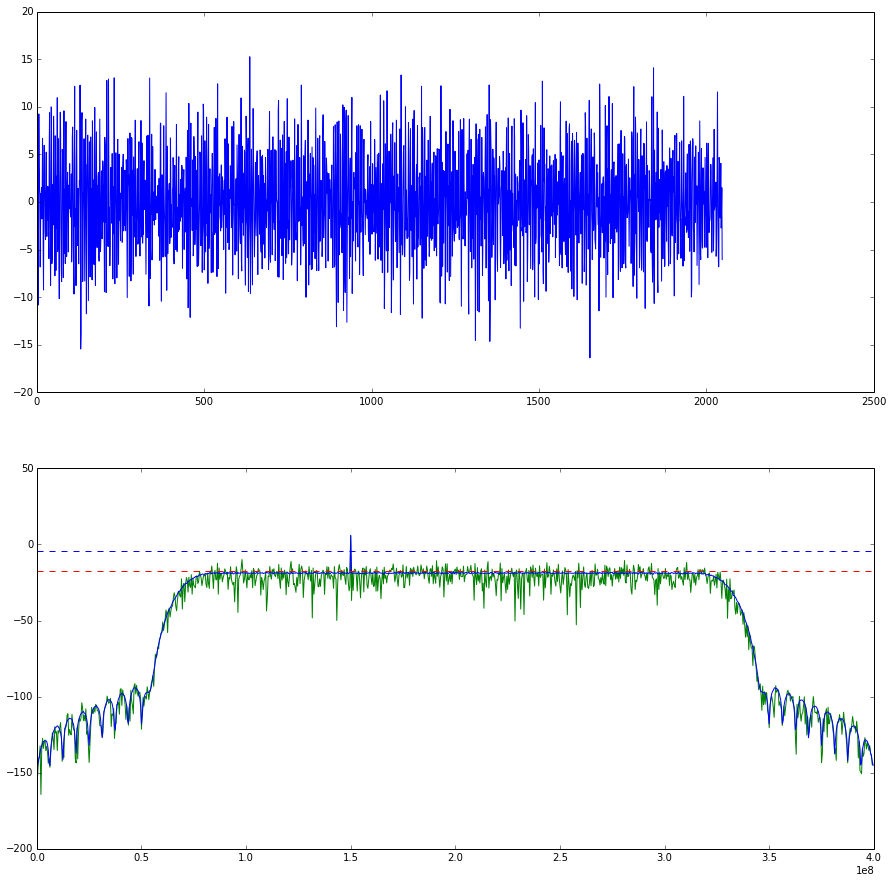

In [46]:
f_samp = 800e6 # digitiser sampling frequency
t_samp = 1/f_samp
tau = 2.56e-3 # accumilation time (arbitrarily set to be a multiple of a power of 2)
N = 1024 # number of samples in the final spectrum
taps = 8
window = hanning(N * 2 * taps) # have used hanning ... not sure what window is used for KAT-7
M = int(tau/t_samp) # total number of samples needed for the accumilation time
random.seed(2)
V = randn(M)*3 # generate a scaled normal distribution random data series
V = convolve(l,convolve(h,V,'same'),'same') # simulate the RF bandpass by convolving with a low and high pass kernel
acc = zeros(N) # create an empty accumilator
amp = 1.0
sig = amp * sin(2 * pi * 1.5e8 * arange(M)*t_samp) # a sinusoid test signal 
V = V + sig
cnt = 0
start = time.time()
for i in range(M/(N*2)-taps):
    v = zeros(N*2)
    if taps > 0: 
        for tap in range(taps):
            v = v + V[(tap+i)*N*2:(tap+i)*N*2+N*2] * window[tap*N*2:tap*N*2+N*2] # extract 2048 (N*2) samples to create the FFT data ... a frame of voltage data
    else:
        v = v + V[i*N*2:i*N*2+N*2]
    f =  fft.fft(v)[:N]/(2 * N) # the FFT data ... output of the f engine data
    auto = f * f.conj() # generate the autocorrelation (determine the power spectrum) ... step one in the X engine
    acc = acc + auto # accumilate the data ... step 2 in the X engine
    cnt += 1
acc = acc/cnt
end = time.time()
print end-start
figure(figsize=(15,15))
subplot(211)
plot(v) # plot a frame of voltage data ... N * 2 vaules
subplot(212)
plot(arange(N)/(2*N*t_samp),10*log10(abs(auto)),'g') # plot the autocorrelation data of a single frame of channelised data
plot(arange(N)/(2*N*t_samp),10*log10(abs(acc)),'b') # plot the final accumilated data ... output of the X engine
rfi = 10*log10(amp/2*0.707)
plot([0,f_samp/2],[rfi,rfi],'--')
mu = 10*log10(std(v)**2) - 10*log10(N*2) - 10*log10(256./400)
plot([0,f_samp/2],[mu,mu],'r--')


In [40]:
start

1438771899.697748